In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import datetime
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
ratio = 100
ratiovalues = [i for i in range(5, ratio, 5)]

twitter_df = pd.read_csv('twitter_data_new.csv')
twitter_df['post_time'] = pd.to_datetime(twitter_df['post_time'])

cvi_df = pd.read_csv('cvi_data.csv')
cvi_df['DATE'] = pd.to_datetime(cvi_df['DATE'])

In [2]:
sia = SentimentIntensityAnalyzer()
def get_sentiment_scores(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['pos'], sentiment['neu'], sentiment['neg']
twitter_df['positive'], twitter_df['neutral'], twitter_df['negative'] = zip(*twitter_df['text'].map(get_sentiment_scores))
twitter_df['score'] = twitter_df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

twitter_df

,Unnamed: 0,id,post_time,text,likes,retweet_user,positive,neutral,negative,score
0,0,1635168482575912962,2023-03-13,We are establishing a bridge bank to protect ...,0,FDICgov,0.200,0.800,0.000,0.6124
1,1,1635157012408602625,2023-03-13,I was confused learning that France’s hyperin...,0,TuurDemeester,0.000,0.907,0.093,-0.1655
2,2,1635151921513398272,2023-03-13,"OH MY, THE CONTRAST--Fed voted down 100%-cash...",0,CaitlinLong_,0.000,0.924,0.076,-0.1027
3,3,1635151459858927621,2023-03-13,@billbarhydt @nic__carter @custodiabank Just ...,0,CaitlinLong_,0.000,1.000,0.000,0.0000
4,5,1635118803528065024,2023-03-13,"Just got off of a zoom meeting with Fed, Trea...",0,RepThomasMassie,0.096,0.904,0.000,0.2023
...,...,...,...,...,...,...,...,...,...,...
3087,3234,1204975097993256960,2019-12-12,"Bitcoiners: ""We're replacing the global fiat ...",0,bitstein,0.000,1.000,0.000,0.0000
3088,3235,1204771699356360704,2019-12-11,BitClub CEO Russ Medlin seeking strategic advi...,142,NaN,0.000,1.000,0.000,0.0000
3089,3236,1204767884385255424,2019-12-11,Fiat money. Fiat art. @saifedean,133,NaN,0.000,1.000,0.000,0.0000
3090,3237,1204766867371560961,2019-12-11,Twitter is funding a small independent team o...,0,jack,0.000,1.000,0.000,0.0000


In [3]:
cvi_df['daily_return'] = cvi_df['CLOSE'].pct_change()

# 將漲幅表示為百分比形式
cvi_df['daily_return'] = cvi_df['daily_return'] * 100
cvi_df['daily_return_t+1'] = cvi_df['daily_return'].shift(-1)
cvi_df['daily_return_t-1'] = cvi_df['daily_return'].shift(1)

cvi_df

,DATE,CLOSE,daily_return,daily_return_t+1,daily_return_t-1
0,2019-03-31,50.3248,NaN,0.853456,NaN
1,2019-04-01,50.7543,0.853456,22.854615,NaN
2,2019-04-02,62.3540,22.854615,20.902588,0.853456
3,2019-04-03,75.3876,20.902588,0.118057,22.854615
4,2019-04-04,75.4766,0.118057,-1.905491,20.902588
...,...,...,...,...,...
1426,2023-02-27,54.4001,-0.842473,-1.587313,2.519911
1427,2023-02-28,53.5366,-1.587313,4.287161,-0.842473
1428,2023-03-01,55.8318,4.287161,3.157520,-1.587313
1429,2023-03-02,57.5947,3.157520,-2.354383,4.287161


In [4]:
merged_df = pd.merge(twitter_df, cvi_df, left_on='post_time', right_on='DATE')

merged_df.dropna(inplace=True)
merged_df.drop('post_time', axis=1, inplace=True)
merged_df.to_csv('merged.csv', index=False)
merged_df

,Unnamed: 0,id,text,likes,retweet_user,positive,neutral,negative,score,DATE,CLOSE,daily_return,daily_return_t+1,daily_return_t-1
1,20,1627507945062957056,BREAKING: the Fed has started hiring CBDC sof...,0,BitcoinPierre,0.000,1.000,0.000,0.0000,2023-02-20,65.8546,1.661513,-0.056640,0.386805
2,21,1627506131525570560,I have a theory:\nRegulators let the bad guys...,0,jespow,0.000,0.720,0.280,-0.7906,2023-02-20,65.8546,1.661513,-0.056640,0.386805
3,22,1626408069667360769,Today we charged Singapore-based Terraform La...,0,SECGov,0.000,0.899,0.101,-0.2023,2023-02-17,64.8248,3.899384,-0.456770,10.981083
4,23,1625169570725261313,"In ancient western Africa, aggry beads—small,...",0,Breedlove22,0.000,1.000,0.000,0.0000,2023-02-13,57.7929,5.040567,-2.852427,-1.049402
6,25,1624236295248842753,Start9 is no longer accepting Bitcoin payment...,0,start9labs,0.125,0.769,0.106,0.1027,2023-02-11,55.6031,-2.621030,-1.049402,-2.126489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,3230,1205257018682068994,"“The birds, the bees, and the private keys.” ...",0,aantonop,0.000,1.000,0.000,0.0000,2019-12-12,66.1663,0.588790,-3.228078,-0.204661
3060,3231,1205232861672067073,"""We have empirical evidence that there will b...",0,danheld,0.118,0.882,0.000,0.3400,2019-12-12,66.1663,0.588790,-3.228078,-0.204661
3061,3232,1205172973738561538,Latest post - Bitcoin Is A Hedge Against Your...,0,Rhythmtrader,0.000,1.000,0.000,0.0000,2019-12-12,66.1663,0.588790,-3.228078,-0.204661
3063,3234,1204975097993256960,"Bitcoiners: ""We're replacing the global fiat ...",0,bitstein,0.000,1.000,0.000,0.0000,2019-12-12,66.1663,0.588790,-3.228078,-0.204661


In [5]:
# from sklearn.preprocessing import StandardScaler
# # 初始化StandardScaler物件
# scaler = StandardScaler()

# # 提取要標準化的特徵欄位並進行標準化
# scaled_data = scaler.fit_transform(merged_df[['score', 'positive', 'negative', 'neutral']])

# # 將標準化後的資料放回原本的DataFrame
# merged_df[['score', 'positive', 'negative', 'neutral']] = scaled_data


In [6]:
X = merged_df[['CLOSE', 'daily_return','daily_return_t-1','likes', 'positive', 'neutral', 'negative', 'score', 'likes']]
y = merged_df['daily_return_t+1']

# 成效很差的線性回歸

test_size=5, train_mse: 33.165, train_r2: 0.096, test_mse: 41.980, test_r2: 0.116
test_size=10, train_mse: 33.586, train_r2: 0.092, test_mse: 33.868, test_r2: 0.141
test_size=15, train_mse: 32.407, train_r2: 0.088, test_mse: 40.780, test_r2: 0.125
test_size=20, train_mse: 30.723, train_r2: 0.089, test_mse: 45.892, test_r2: 0.097
test_size=25, train_mse: 30.116, train_r2: 0.098, test_mse: 44.453, test_r2: 0.090
test_size=30, train_mse: 30.875, train_r2: 0.095, test_mse: 40.301, test_r2: 0.095
test_size=35, train_mse: 29.925, train_r2: 0.094, test_mse: 41.040, test_r2: 0.088
test_size=40, train_mse: 29.946, train_r2: 0.089, test_mse: 39.666, test_r2: 0.094
test_size=45, train_mse: 30.125, train_r2: 0.084, test_mse: 38.419, test_r2: 0.097
test_size=50, train_mse: 28.148, train_r2: 0.066, test_mse: 40.291, test_r2: 0.090
test_size=55, train_mse: 28.832, train_r2: 0.075, test_mse: 38.323, test_r2: 0.091
test_size=60, train_mse: 31.110, train_r2: 0.077, test_mse: 35.828, test_r2: 0.096
test_

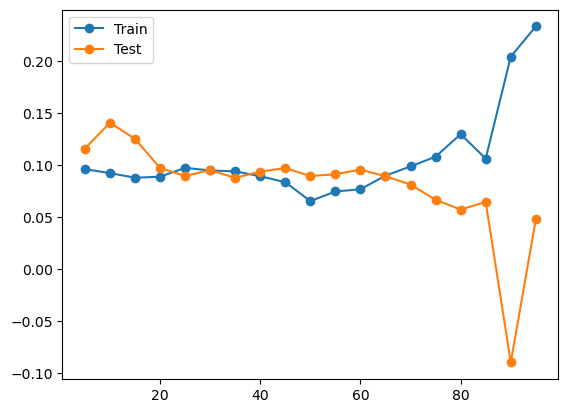

In [7]:
from sklearn.linear_model import LinearRegression

train_r2_score = []
test_r2_score = []

for i in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100, random_state=2023)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_pred_train)  # 均方誤差
    train_r2 = r2_score(y_train, y_pred_train)  # 決定係數
    
    y_pred_test = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred_test)  # 均方誤差
    test_r2 = r2_score(y_test, y_pred_test)  # 決定係數
    
    train_r2_score.append(train_r2)
    test_r2_score.append(test_r2)
    
    print('test_size=%d, train_mse: %.3f, train_r2: %.3f, test_mse: %.3f, test_r2: %.3f' % (i, train_mse, train_r2, test_mse, test_r2))

plt.plot(ratiovalues, train_r2_score, '-o', label='Train')
plt.plot(ratiovalues, test_r2_score, '-o', label='Test')
plt.legend()
plt.show()

# 效果還不錯的Decision tree

test_size=5, train_mse: 0.000, train_r2: 1.000, test_mse: 7.379, test_r2: 0.845
test_size=10, train_mse: 0.000, train_r2: 1.000, test_mse: 12.617, test_r2: 0.680
test_size=15, train_mse: 0.000, train_r2: 1.000, test_mse: 11.379, test_r2: 0.756
test_size=20, train_mse: 0.000, train_r2: 1.000, test_mse: 11.554, test_r2: 0.773
test_size=25, train_mse: 0.000, train_r2: 1.000, test_mse: 26.745, test_r2: 0.452
test_size=30, train_mse: 0.000, train_r2: 1.000, test_mse: 24.814, test_r2: 0.443
test_size=35, train_mse: 0.000, train_r2: 1.000, test_mse: 22.803, test_r2: 0.493
test_size=40, train_mse: 0.000, train_r2: 1.000, test_mse: 15.073, test_r2: 0.656
test_size=45, train_mse: 0.000, train_r2: 1.000, test_mse: 18.462, test_r2: 0.566
test_size=50, train_mse: 0.000, train_r2: 1.000, test_mse: 18.817, test_r2: 0.575
test_size=55, train_mse: 0.000, train_r2: 1.000, test_mse: 19.136, test_r2: 0.546
test_size=60, train_mse: 0.000, train_r2: 1.000, test_mse: 19.658, test_r2: 0.504
test_size=65, trai

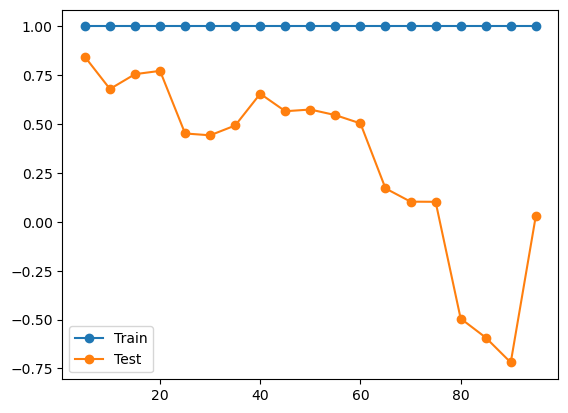

In [8]:
from sklearn.tree import DecisionTreeRegressor

train_r2_score = []
test_r2_score = []

for i in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100, random_state=2023)
    model = DecisionTreeRegressor(random_state=2023)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_pred_train)  # 均方誤差
    train_r2 = r2_score(y_train, y_pred_train)  # 決定係數
    
    y_pred_test = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred_test)  # 均方誤差
    test_r2 = r2_score(y_test, y_pred_test)  # 決定係數
    
    train_r2_score.append(train_r2)
    test_r2_score.append(test_r2)
    
    print('test_size=%d, train_mse: %.3f, train_r2: %.3f, test_mse: %.3f, test_r2: %.3f' % (i, train_mse, train_r2, test_mse, test_r2))

plt.plot(ratiovalues, train_r2_score, '-o', label='Train')
plt.plot(ratiovalues, test_r2_score, '-o', label='Test')
plt.legend()
plt.show()

# 效果一樣不錯的KNN

test_size=5, train_mse: 7.260, train_r2: 0.802, test_mse: 9.784, test_r2: 0.794
test_size=10, train_mse: 7.210, train_r2: 0.805, test_mse: 11.658, test_r2: 0.704
test_size=15, train_mse: 7.913, train_r2: 0.777, test_mse: 14.600, test_r2: 0.687
test_size=20, train_mse: 8.642, train_r2: 0.744, test_mse: 19.635, test_r2: 0.614
test_size=25, train_mse: 8.584, train_r2: 0.743, test_mse: 20.843, test_r2: 0.573
test_size=30, train_mse: 9.237, train_r2: 0.729, test_mse: 19.612, test_r2: 0.560
test_size=35, train_mse: 9.967, train_r2: 0.698, test_mse: 21.071, test_r2: 0.532
test_size=40, train_mse: 10.386, train_r2: 0.684, test_mse: 20.456, test_r2: 0.533
test_size=45, train_mse: 11.144, train_r2: 0.661, test_mse: 20.518, test_r2: 0.518
test_size=50, train_mse: 12.663, train_r2: 0.580, test_mse: 22.126, test_r2: 0.500
test_size=55, train_mse: 13.458, train_r2: 0.568, test_mse: 21.786, test_r2: 0.484
test_size=60, train_mse: 14.338, train_r2: 0.575, test_mse: 20.948, test_r2: 0.471
test_size=65,

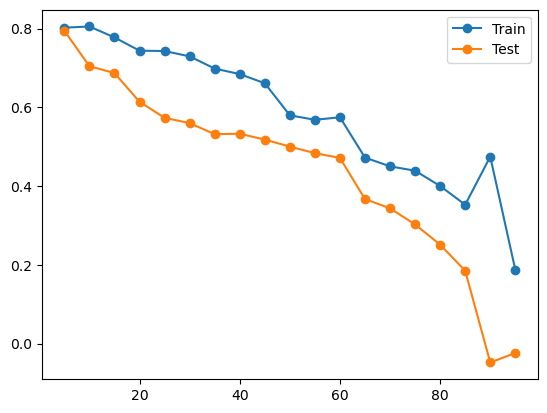

In [9]:
from sklearn.neighbors import KNeighborsRegressor

train_r2_score = []
test_r2_score = []

for i in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100, random_state=2023)
    model = KNeighborsRegressor(n_neighbors=5, weights = 'uniform')
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_pred_train)  # 均方誤差
    train_r2 = r2_score(y_train, y_pred_train)  # 決定係數
    
    y_pred_test = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred_test)  # 均方誤差
    test_r2 = r2_score(y_test, y_pred_test)  # 決定係數
    
    train_r2_score.append(train_r2)
    test_r2_score.append(test_r2)
    
    print('test_size=%d, train_mse: %.3f, train_r2: %.3f, test_mse: %.3f, test_r2: %.3f' % (i, train_mse, train_r2, test_mse, test_r2))

plt.plot(ratiovalues, train_r2_score, '-o', label='Train')
plt.plot(ratiovalues, test_r2_score, '-o', label='Test')
plt.legend()
plt.show()

# 跟線性回歸一樣爛的SVR，其他kernel我一樣試過了，一樣差

test_size=5, train_mse: 33.963, train_r2: 0.075, test_mse: 43.822, test_r2: 0.077
test_size=10, train_mse: 34.323, train_r2: 0.073, test_mse: 36.120, test_r2: 0.084
test_size=15, train_mse: 33.034, train_r2: 0.070, test_mse: 42.957, test_r2: 0.079
test_size=20, train_mse: 31.317, train_r2: 0.071, test_mse: 47.620, test_r2: 0.063
test_size=25, train_mse: 30.738, train_r2: 0.079, test_mse: 45.708, test_r2: 0.064
test_size=30, train_mse: 31.546, train_r2: 0.075, test_mse: 41.546, test_r2: 0.067
test_size=35, train_mse: 30.647, train_r2: 0.072, test_mse: 41.694, test_r2: 0.073
test_size=40, train_mse: 30.739, train_r2: 0.065, test_mse: 40.765, test_r2: 0.069
test_size=45, train_mse: 30.849, train_r2: 0.062, test_mse: 39.603, test_r2: 0.070
test_size=50, train_mse: 28.449, train_r2: 0.056, test_mse: 41.300, test_r2: 0.067
test_size=55, train_mse: 29.156, train_r2: 0.064, test_mse: 39.029, test_r2: 0.075
test_size=60, train_mse: 31.492, train_r2: 0.066, test_mse: 36.624, test_r2: 0.076
test_

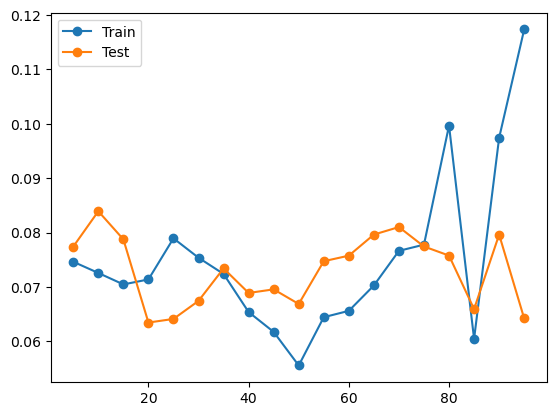

In [10]:
from sklearn.svm import SVR

train_r2_score = []
test_r2_score = []

for i in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100, random_state=2023)
    model = SVR(kernel='linear')
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_pred_train)  # 均方誤差
    train_r2 = r2_score(y_train, y_pred_train)  # 決定係數
    
    y_pred_test = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred_test)  # 均方誤差
    test_r2 = r2_score(y_test, y_pred_test)  # 決定係數
    
    train_r2_score.append(train_r2)
    test_r2_score.append(test_r2)
    
    print('test_size=%d, train_mse: %.3f, train_r2: %.3f, test_mse: %.3f, test_r2: %.3f' % (i, train_mse, train_r2, test_mse, test_r2))

plt.plot(ratiovalues, train_r2_score, '-o', label='Train')
plt.plot(ratiovalues, test_r2_score, '-o', label='Test')
plt.legend()
plt.show()

# 效果不錯的Randomforest

test_size=5, train_mse: 1.131, train_r2: 0.969, test_mse: 4.690, test_r2: 0.901
test_size=10, train_mse: 1.092, train_r2: 0.970, test_mse: 7.597, test_r2: 0.807
test_size=15, train_mse: 1.065, train_r2: 0.970, test_mse: 8.107, test_r2: 0.826
test_size=20, train_mse: 1.262, train_r2: 0.963, test_mse: 9.533, test_r2: 0.813
test_size=25, train_mse: 1.445, train_r2: 0.957, test_mse: 11.030, test_r2: 0.774
test_size=30, train_mse: 1.481, train_r2: 0.957, test_mse: 10.385, test_r2: 0.767
test_size=35, train_mse: 1.611, train_r2: 0.951, test_mse: 12.846, test_r2: 0.715
test_size=40, train_mse: 1.879, train_r2: 0.943, test_mse: 13.241, test_r2: 0.698
test_size=45, train_mse: 1.584, train_r2: 0.952, test_mse: 12.643, test_r2: 0.703
test_size=50, train_mse: 2.011, train_r2: 0.933, test_mse: 14.095, test_r2: 0.682
test_size=55, train_mse: 2.125, train_r2: 0.932, test_mse: 13.497, test_r2: 0.680
test_size=60, train_mse: 2.164, train_r2: 0.936, test_mse: 12.207, test_r2: 0.692
test_size=65, train_m

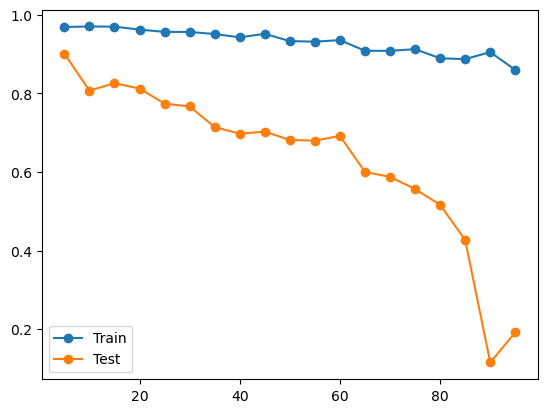

In [11]:
from sklearn.ensemble import RandomForestRegressor

train_r2_score = []
test_r2_score = []

for i in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100, random_state=2023)
    model = RandomForestRegressor(n_estimators = 100, random_state = 2023)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_pred_train)  # 均方誤差
    train_r2 = r2_score(y_train, y_pred_train)  # 決定係數
    
    y_pred_test = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred_test)  # 均方誤差
    test_r2 = r2_score(y_test, y_pred_test)  # 決定係數
    
    train_r2_score.append(train_r2)
    test_r2_score.append(test_r2)
    
    print('test_size=%d, train_mse: %.3f, train_r2: %.3f, test_mse: %.3f, test_r2: %.3f' % (i, train_mse, train_r2, test_mse, test_r2))

plt.plot(ratiovalues, train_r2_score, '-o', label='Train')
plt.plot(ratiovalues, test_r2_score, '-o', label='Test')
plt.legend()
plt.show()

# 調參 random forest, knn, decision tree

每個都有調測試資料的比例

In [12]:
ratio = 35
ratiovalues = [i for i in range(5, ratio, 5)]

# decision tree

調leap以及depth

In [13]:
leaf = 10
leafvalues = [i for i in range(1, leaf)]
depth = 21
depthvalues = [i for i in range(1, depth)]

relative_best_test_r2 = 0
relative_best_test_mse = 0
relative_best_depth = 0
relative_best_leaf = 0
test_ratio = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = k/100, random_state=2023)
    for i in depthvalues:
        for j in leafvalues:
            model = DecisionTreeRegressor(random_state = 2023, max_depth = i, min_samples_leaf = j)
            model.fit(X_train, y_train)
            y_pred_train = model.predict(X_train)
            train_mse = mean_squared_error(y_train, y_pred_train)  # 均方誤差
            train_r2 = r2_score(y_train, y_pred_train)  # 決定係數
    
            y_pred_test = model.predict(X_test)
            test_mse = mean_squared_error(y_test, y_pred_test)  # 均方誤差
            test_r2 = r2_score(y_test, y_pred_test)  # 決定係數
    
            if test_r2 > relative_best_test_r2:
                relative_best_test_r2 = test_r2
                relative_best_test_mse = test_mse
                relative_best_depth = i
                relative_best_leaf = j
                test_ratio = k

print("best depth:", relative_best_depth, "best min_sample_leaf:", relative_best_leaf, \
      "\nTesting r2:", relative_best_test_r2, "testing mse:", relative_best_test_mse, \
      "\ntest_ratio:", test_ratio)



best depth: 20 best min_sample_leaf: 2 
Testing r2: 0.8683254269387181 testing mse: 6.2545055091925645 
test_ratio: 5


# random forest

調estimators跟depth

In [14]:
estimators = 200
estimatorvalue = [i for i in range(100, estimators, 10)]

depth = 20
depthvalues = [i for i in range(5, depth, 1)]

relative_best_test_r2 = 0
relative_best_test_mse = 0
relative_best_estimators = 0
relative_best_max_depth = 0
test_ratio = 0


for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = k/100, random_state=2023)
    print(k)
    for j in depthvalues:
        for i in estimatorvalue:
            model = RandomForestRegressor(random_state = 2023, n_estimators = i, max_depth = j)
            model.fit(X_train, y_train)
            y_pred_train = model.predict(X_train)
            train_mse = mean_squared_error(y_train, y_pred_train)  # 均方誤差
            train_r2 = r2_score(y_train, y_pred_train)  # 決定係數
    
            y_pred_test = model.predict(X_test)
            test_mse = mean_squared_error(y_test, y_pred_test)  # 均方誤差
            test_r2 = r2_score(y_test, y_pred_test)  # 決定係數
    
            if test_r2 > relative_best_test_r2:
                relative_best_test_r2 = test_r2
                relative_best_test_mse = test_mse
                relative_best_estimators = i
                relative_best_max_depth = j
                test_ratio = k
            
print("best n_estimators:", relative_best_estimators,"best max_depth:", relative_best_max_depth, \
      "\nTesting r2:", relative_best_test_r2, "testing mse:", relative_best_test_mse, \
      "\ntest_ratio:", test_ratio)

5
10
15
20
25
30
best n_estimators: 130 best max_depth: 18 
Testing r2: 0.9028250055240712 testing mse: 4.61578514496181 
test_ratio: 5


# knn

調neighbors, weight, algorithm, p

In [15]:
neighbors = 20
neighborvalues = [i for i in range(1, neighbors, 1)]

weights_value = ["uniform", "distance"]
algorithm_value = ["ball_tree", "kd_tree", "brute"]
p_value = [1, 2]

relative_best_test_r2 = 0
relative_best_test_mse = 0
relative_best_neighbors = 0
relative_best_weights = 0
relative_best_algorithm = 0
relative_best_p = 0
test_ratio = 0


for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = k/100, random_state=2023)
    print(k)
    for j in neighborvalues:
        for i in weights_value:
            for a in algorithm_value:
                for t in p_value:
                    
                    model = KNeighborsRegressor(n_neighbors = j, weights = i, algorithm = a, p = t)
                    model.fit(X_train, y_train)
                    y_pred_train = model.predict(X_train)
                    train_mse = mean_squared_error(y_train, y_pred_train)  # 均方誤差
                    train_r2 = r2_score(y_train, y_pred_train)  # 決定係數
    
                    y_pred_test = model.predict(X_test)
                    test_mse = mean_squared_error(y_test, y_pred_test)  # 均方誤差
                    test_r2 = r2_score(y_test, y_pred_test)  # 決定係數
    
                    if test_r2 > relative_best_test_r2:
                        relative_best_test_r2 = test_r2
                        relative_best_test_mse = test_mse
                        relative_best_neighbors = j
                        relative_best_weights = i
                        relative_best_algorithm = a
                        relative_best_p = t
                        test_ratio = k
            
print("best n_neighbors:", relative_best_neighbors,"best weights:", relative_best_weights, \
      "best algorithm:", relative_best_algorithm, "best p:", relative_best_p, \
      "\nTesting r2:", relative_best_test_r2, "testing mse:", relative_best_test_mse, \
      "\ntest_ratio:", test_ratio)

5
10
15
20
25
30
best n_neighbors: 4 best weights: distance best algorithm: ball_tree best p: 1 
Testing r2: 0.9445219469039781 testing mse: 2.6351920546334853 
test_ratio: 5
